In [ ]:
"Table 1.1"

In [7]:
import pandas as pd

df = pd.read_excel("33010DO001_2019_ST_AUST.xlsx", sheet_name="Table 1.1", skiprows=6)
df.head(2)

,Place of Usual Residence,Unnamed: 1,Estimated resident population,Births,15–19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,...,Births.7,15–19 years.7,20-24 years.7,25-29 years.7,30-34 years.7,35-39 years.7,40-44 years.7,45-49 years.7,Total fertility rate.7,Median age of mother.7
0,2016 ASGS code,"2016 GCCSA, SA4",persons,no.,rate,rate,rate,rate,rate,rate,...,no.,rate,rate,rate,rate,rate,rate,rate,rate,years
1,1,NEW SOUTH WALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

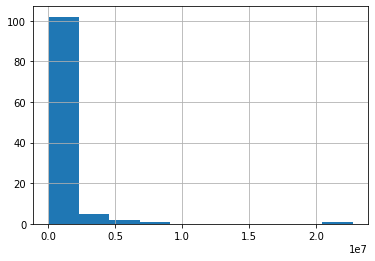

In [8]:
df.drop([0], axis=0, inplace=True)
df["Estimated resident population"].hist()